# Project Inscriptions -- Exploratory Data Analysis

**[Krzysztof Gogol](https://www.linkedin.com/in/krzysztofgogol), February 2025**


In [1]:
import pandas as pd

In [2]:
import os
import sys
code_dir = os.path.realpath(os.path.join(os.getcwd(), "..", "src"))
sys.path.append(code_dir)

In [3]:
from plot_utils import get_plotly_layout
from plot_utils import colors
width, height = 800, 450

In [4]:
# Existing dataset dir
data_dir = os.path.realpath(os.path.join(os.getcwd(), "..", "data"))
plots_dir = os.path.realpath(os.path.join(os.getcwd(), "..", "plots"))

# Existing plots dir
os.makedirs(data_dir, exist_ok=True)
os.makedirs(plots_dir, exist_ok=True)

In [5]:
import plotly.graph_objects as go
import plotly.io as pio
pio.kaleido.scope.mathjax = None

## Exploratory Data Analysis


In [6]:
plot_settings = {
    'arbitrum': {'color': colors['blue'], 'label': 'Arbitrum', 'style': 'solid', 'width': 4, 'marker_symbol': 'circle'},
    'base': {'color': colors['red'], 'label': 'Base', 'style': 'dash', 'width': 3.5, 'marker_symbol': 'diamond'},
    'ethereum': {'color': colors['green'], 'label': 'Ethereum', 'style': 'dot', 'width': 3, 'marker_symbol': 'square'},
    'optimism': {'color': colors['grey'], 'label': 'Optimism', 'style': 'dashdot', 'width': 2.5, 'marker_symbol': 'triangle-up'},
    'zksync_era': {'color': colors['pink'], 'label': 'zkSync', 'style': 'solid', 'width': 2, 'marker_symbol': 'cross'},
    'fantom': {'color': colors['brown'], 'label': 'Fantom', 'style': 'dash', 'width': 1.5, 'marker_symbol': 'star'},
}

In [7]:
import requests as rq
url = 'https://api.growthepie.xyz/v1/fundamentals_full.json'
response = rq.get(url)
df = pd.DataFrame(response.json())

print("There are {} data points".format(df.shape[0]))
print("The data was collected from the time period {} to {}".format(
    df['date'].min(), df['date'].max()))
print("There are {} chains".format(df['origin_key'].nunique()))
print("There are {} metrics".format(df['metric_key'].nunique()))

There are 393700 data points
The data was collected from the time period 2021-06-01 to 2025-02-26
There are 30 chains
There are 26 metrics


In [8]:
# Distribution of data points per chain
df['origin_key'].value_counts()

origin_key
arbitrum         29820
optimism         29464
metis            26081
starknet         24573
loopring         22256
polygon_zkevm    20539
imx              18850
zksync_era       16420
ethereum         15224
zora             14357
base             14093
linea            13863
rhino            13754
manta            13403
mantle           13280
scroll           12822
blast            11414
mode             10882
derive           10018
orderly           9977
fraxtal           9546
taiko             7424
worldchain        6385
mint              6359
redstone          6018
gravity           6008
real              5922
ink               1755
soneium           1729
swell             1464
Name: count, dtype: int64

In [9]:
# Distribution of data points per metric
df['metric_key'].value_counts()

metric_key
stables_mcap          24354
stables_mcap_eth      24354
tvl                   19129
tvl_eth               19129
daa                   18970
txcount               18928
costs_l1_eth          18297
costs_l1_usd          18297
costs_total_eth       18297
costs_total_usd       18297
fees_paid_eth         15281
fees_paid_usd         15281
txcosts_median_eth    15213
txcosts_median_usd    15213
rent_paid_eth         14901
rent_paid_usd         14901
gas_per_second        12729
aa_last7d             12483
market_cap_usd        12142
market_cap_eth        12142
profit_usd            11024
profit_eth            11024
fdv_usd               10959
fdv_eth               10959
costs_blobs_eth        5698
costs_blobs_usd        5698
Name: count, dtype: int64

In [10]:
tx_count_data = {}  # Dictionary to store tx count data for each chain

chains = [
    'arbitrum',
    'base',
    'ethereum',
    'optimism',
    'zksync_era'
]

for chain in chains:
    # Filter data based on conditions
    filtered_data = df[(df['metric_key'] == 'txcount') &
                       (df['origin_key'] == chain)  # &
                       #    (df['date'] >= '2023-11-01') &
                       #    (df['date'] <= '2024-03-24')
                       ].sort_values('date').copy()
    # Store filtered data in the dictionary
    tx_count_data[chain] = filtered_data

# Access the tx count data for a specific chain, for example, 'arbitrum'
print(tx_count_data['zksync_era'])

       metric_key  origin_key        date    value
374775    txcount  zksync_era  2023-02-14      6.0
374776    txcount  zksync_era  2023-02-15     18.0
374777    txcount  zksync_era  2023-02-16    112.0
374779    txcount  zksync_era  2023-02-17     30.0
374936    txcount  zksync_era  2023-02-18      1.0
...           ...         ...         ...      ...
376373    txcount  zksync_era  2025-02-22  63554.0
376510    txcount  zksync_era  2025-02-23  50878.0
375689    txcount  zksync_era  2025-02-24  79939.0
375934    txcount  zksync_era  2025-02-25  96333.0
376276    txcount  zksync_era  2025-02-26  83459.0

[744 rows x 4 columns]


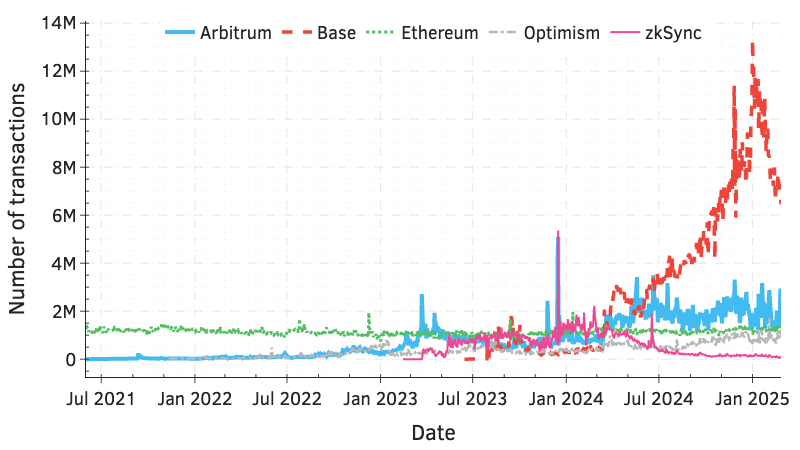

In [11]:
fig = go.Figure(layout=get_plotly_layout(height=height, width=width))

for protocol, df_data in tx_count_data.items():
    fig.add_trace(go.Scatter(
        x=df_data['date'], y=df_data['value'],
        line=dict(color=plot_settings[protocol]['color'], width=plot_settings[protocol]
                  ['width'], dash=plot_settings[protocol]['style']),
        name=plot_settings[protocol]['label'],
        marker=dict(size=8, symbol=plot_settings[protocol]['marker_symbol'])
    ))

fig.update_layout(yaxis_title="Number of transactions",
                  xaxis_title="Date",
                  # yaxis=dict(type="log", range=[0, 10]),
                  legend=dict(xanchor='center', x=0.5, y=1.02, orientation='h'))

file_dir = os.path.realpath(os.path.join(
    plots_dir, "all-transactions-count.pdf"))
fig.write_image(file_dir)
fig.show("png")

In [12]:
tx_cost_data = {}  # Dictionary to store tx count data for each chain

for chain in chains:
    # Filter data based on conditions
    filtered_data = df[(df['metric_key'] == 'txcosts_median_usd') &
                       (df['origin_key'] == chain) &
                       (df['date'] >= '2023-11-01') &
                       (df['date'] <= '2024-03-24')].sort_values('date').copy()

    # Store filtered data in the dictionary
    tx_cost_data[chain] = filtered_data

# Access the tx count data for a specific chain, for example, 'arbitrum'
print(tx_cost_data['arbitrum'])

                metric_key origin_key        date     value
369754  txcosts_median_usd   arbitrum  2023-11-01  0.152080
368901  txcosts_median_usd   arbitrum  2023-11-02  0.154832
368691  txcosts_median_usd   arbitrum  2023-11-03  0.131348
370075  txcosts_median_usd   arbitrum  2023-11-04  0.113501
369824  txcosts_median_usd   arbitrum  2023-11-05  0.123952
...                    ...        ...         ...       ...
361824  txcosts_median_usd   arbitrum  2024-03-20  0.009184
369780  txcosts_median_usd   arbitrum  2024-03-21  0.008960
369817  txcosts_median_usd   arbitrum  2024-03-22  0.008479
369840  txcosts_median_usd   arbitrum  2024-03-23  0.007420
361768  txcosts_median_usd   arbitrum  2024-03-24  0.007874

[145 rows x 4 columns]


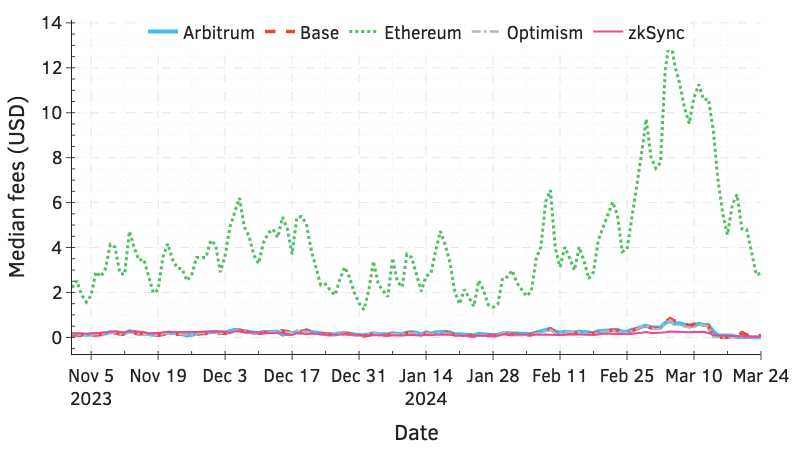

In [13]:
fig = go.Figure(layout=get_plotly_layout(height=height, width=width))

for protocol, df_data in tx_cost_data.items():
    fig.add_trace(go.Scatter(
        x=df_data['date'], y=df_data['value'],
        line=dict(color=plot_settings[protocol]['color'], width=plot_settings[protocol]
                  ['width'], dash=plot_settings[protocol]['style']),
        name=plot_settings[protocol]['label'],
        marker=dict(size=8, symbol=plot_settings[protocol]['marker_symbol'])
    ))

fig.update_layout(yaxis_title="Median fees (USD)",
                  xaxis_title="Date",
                  # yaxis=dict(type="log", range=[0, 10]),
                  legend=dict(xanchor='center', x=0.5, y=1.02, orientation='h'))
file_dir = os.path.realpath(os.path.join(plots_dir, "all-transactions-fees.pdf"))
fig.write_image(file_dir)
fig.show("png")